In [1]:
#import all the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
import joblib
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import  LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import  XGBRegressor
from sklearn import warnings
from sklearn.pipeline import FeatureUnion
warnings.filterwarnings("ignore")

#### Load datasets

In [2]:
#load 
training_data = pd.read_csv('/home/nsomazr/AISuccess/Challenges/Zindi/SendLogistics/Data/Train.csv')

In [3]:
#load rider info
rider_info = pd.read_csv('/home/nsomazr/AISuccess/Challenges/Zindi/SendLogistics/Data/Riders.csv')

#### Get information about dataset 
- Training data
- Rider data

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [5]:
#As it can be seen from the information training data have 29 columns
training_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [6]:
#check info for riders
rider_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
Rider Id          960 non-null object
No_Of_Orders      960 non-null int64
Age               960 non-null int64
Average_Rating    960 non-null float64
No_of_Ratings     960 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [7]:
#riders data have 5 columns
rider_info.columns

Index(['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'], dtype='object')

#### Merge the two datasets

In [8]:
#check for the common column to merge on ('Rider Id')

In [9]:
dataset = pd.merge(training_data,rider_info,on='Rider Id',how='left')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [11]:
dataset.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


#### Create a class for renaming columns

In [12]:
class RenameColumns(BaseEstimator,TransformerMixin):
    def __init__(self,column_names):
        self.column_names = column_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        new_names = [(str(i).replace(' ','_')).replace('-','') for i in column_names]
        X.columns = new_names
        return X

#### Rename colum names

In [13]:
#create an object of renamecolumn class
column_names = dataset.columns
rename = RenameColumns(column_names=column_names)

In [14]:
#fit and transform the column names
dataset = rename.fit_transform(dataset)

In [15]:
dataset.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


#### Drop easy visible unimportant class

In [16]:
class DropLessImportant(BaseEstimator,TransformerMixin):
    def __init__(self,less_important_cols):
        self.less_important_cols = less_important_cols
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X = X.drop(self.less_important_cols,axis=1)
        return X

In [17]:
less_important_cols = ['Order_No','User_Id','Rider_Id']
drop_less_important = DropLessImportant(less_important_cols=less_important_cols)

In [18]:
dataset = drop_less_important.fit_transform(dataset)

#### Identify the type of attributes then separate them from each other for easy processing

In [19]:
dataset.dtypes

Vehicle_Type                                 object
Platform_Type                                 int64
Personal_or_Business                         object
Placement__Day_of_Month                       int64
Placement__Weekday_(Mo_=_1)                   int64
Placement__Time                              object
Confirmation__Day_of_Month                    int64
Confirmation__Weekday_(Mo_=_1)                int64
Confirmation__Time                           object
Arrival_at_Pickup__Day_of_Month               int64
Arrival_at_Pickup__Weekday_(Mo_=_1)           int64
Arrival_at_Pickup__Time                      object
Pickup__Day_of_Month                          int64
Pickup__Weekday_(Mo_=_1)                      int64
Pickup__Time                                 object
Arrival_at_Destination__Day_of_Month          int64
Arrival_at_Destination__Weekday_(Mo_=_1)      int64
Arrival_at_Destination__Time                 object
Distance_(KM)                                 int64
Temperature 

In [20]:
categorical_time_attributes = ['Vehicle_Type','Personal_or_Business','Placement__Time','Confirmation__Time','Pickup__Time','Arrival_at_Pickup__Time','Arrival_at_Destination__Time']

#### Get numerical,categorical and time series attribute(a form of categorical)

In [21]:
#define a class for getting numerical attributes 
class NumericalAttributes(BaseEstimator,TransformerMixin):
    def __init__(self,other_attributes):
        self.other_attributes = other_attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        numerical_attributes = [i for i in X.columns if i not in self.other_attributes]
        return numerical_attributes

In [22]:
get_num_attr = NumericalAttributes(other_attributes=categorical_time_attributes)
numerical_attributes = get_num_attr.fit_transform(dataset)

In [23]:
numerical_attributes

['Platform_Type',
 'Placement__Day_of_Month',
 'Placement__Weekday_(Mo_=_1)',
 'Confirmation__Day_of_Month',
 'Confirmation__Weekday_(Mo_=_1)',
 'Arrival_at_Pickup__Day_of_Month',
 'Arrival_at_Pickup__Weekday_(Mo_=_1)',
 'Pickup__Day_of_Month',
 'Pickup__Weekday_(Mo_=_1)',
 'Arrival_at_Destination__Day_of_Month',
 'Arrival_at_Destination__Weekday_(Mo_=_1)',
 'Distance_(KM)',
 'Temperature',
 'Precipitation_in_millimeters',
 'Pickup_Lat',
 'Pickup_Long',
 'Destination_Lat',
 'Destination_Long',
 'Time_from_Pickup_to_Arrival',
 'No_Of_Orders',
 'Age',
 'Average_Rating',
 'No_of_Ratings']

In [24]:
#idenfy time_attributes 
categorical_attributes = ['Vehicle_Type','Personal_or_Business']

#### Process time series attributes 

In [25]:
class ProcessTime(BaseEstimator,TransformerMixin):
    def __init__(self,categorical_time_attributes,categorical_attributes):
        self.categorical_time_attributes = categorical_time_attributes
        self.categorical_attributes = categorical_attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        time_attributes = [i for i in self.categorical_time_attributes if i not in self.categorical_attributes]
        X[time_attributes] = pd.to_datetime(X[time_attributes].stack()).unstack()
        for i in time_attributes:
            X[i] = X[i].dt.hour 
        return X    
            

In [26]:
#create an object
process_time = ProcessTime(categorical_time_attributes,categorical_attributes)
dataset = process_time.fit_transform(dataset)

In [27]:
dataset.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Bike,3,Business,9,5,9,9,5,9,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,Bike,3,Personal,12,5,11,12,5,11,12,...,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
2,Bike,3,Business,30,2,12,30,2,12,30,...,NaN,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114
3,Bike,3,Business,15,5,9,15,5,9,15,...,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
4,Bike,1,Personal,13,1,9,13,1,9,13,...,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533


#### Process categorical attributes 

In [28]:
class ProcessCategorical(BaseEstimator,TransformerMixin):
    def __init__(self,categorical_attributes):
        self.categorical_attributes = categorical_attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        label_encoder  = LabelEncoder()
        for i in categorical_attributes:
            X[i] = label_encoder.fit_transform(X[i])
        return X

In [29]:
cat_processor = ProcessCategorical(categorical_attributes=categorical_attributes)
dataset = cat_processor.fit_transform(dataset)

In [30]:
dataset.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,0,3,0,9,5,9,9,5,9,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,0,3,1,12,5,11,12,5,11,12,...,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
2,0,3,0,30,2,12,30,2,12,30,...,NaN,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114
3,0,3,0,15,5,9,15,5,9,15,...,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
4,0,1,1,13,1,9,13,1,9,13,...,NaN,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533


In [31]:
dataset.columns

Index(['Vehicle_Type', 'Platform_Type', 'Personal_or_Business',
       'Placement__Day_of_Month', 'Placement__Weekday_(Mo_=_1)',
       'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_(Mo_=_1)', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month',
       'Arrival_at_Pickup__Weekday_(Mo_=_1)', 'Arrival_at_Pickup__Time',
       'Pickup__Day_of_Month', 'Pickup__Weekday_(Mo_=_1)', 'Pickup__Time',
       'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_(Mo_=_1)',
       'Arrival_at_Destination__Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Time_from_Pickup_to_Arrival',
       'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

#### Check for outliers

In [32]:
class ShowOutliers(BaseEstimator,TransformerMixin):
    def __init__(self,categorical_time_attributes,categorical_attributes,num_attributes):
        self.categorical_time_attributes = categorical_time_attributes
        self.categorical_attributes = categorical_attributes
        self.num_attributes = num_attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        numerical_attributes_comb = self.num_attributes + [i for i in self.categorical_time_attributes if i not in self.categorical_attributes]
        fig,index = plt.subplots(figsize=(5,5),ncols=len(numerical_attributes_comb))
        for i in range(len(numerical_attributes_comb)):
            sb.set_style('whitegrid')
            plt.grid(False)
            index[i] = sb.boxplot(X[numerical_attributes_comb[i]])
            plt.show()

In [33]:
show_outliers = ShowOutliers(categorical_time_attributes,categorical_attributes,numerical_attributes)

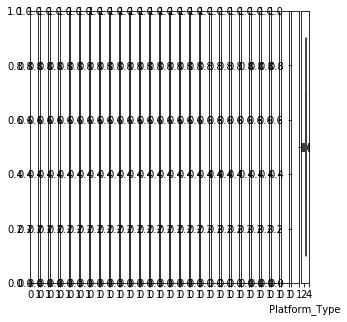

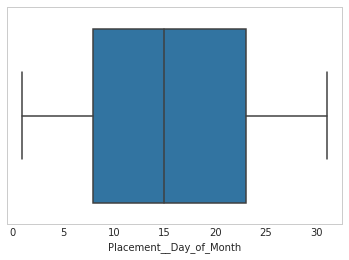

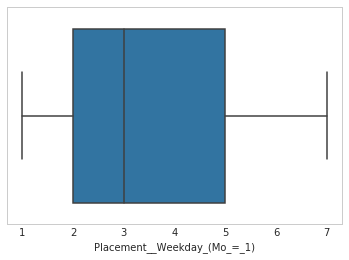

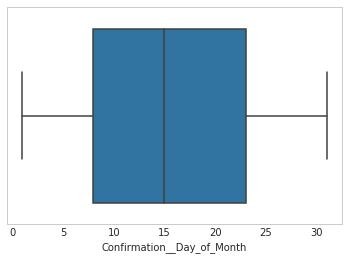

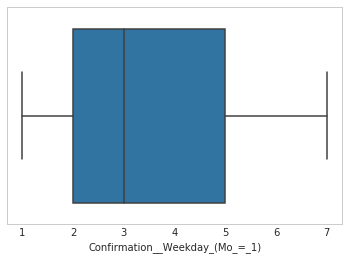

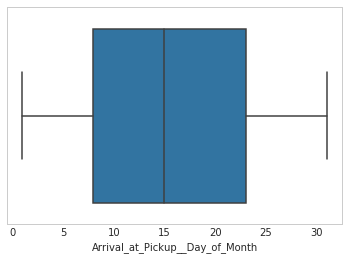

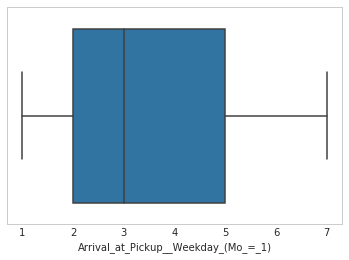

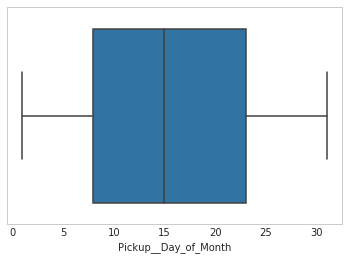

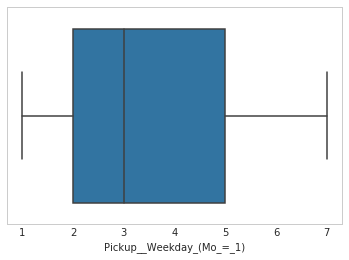

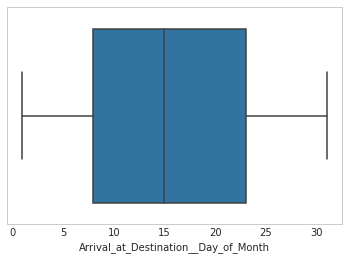

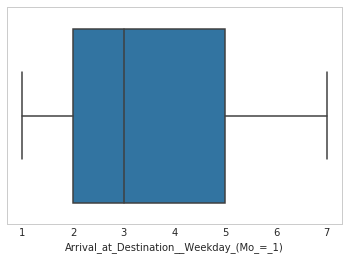

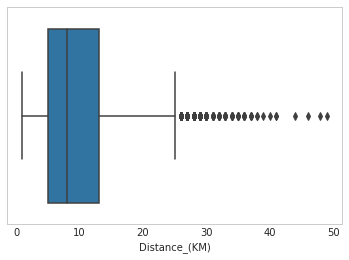

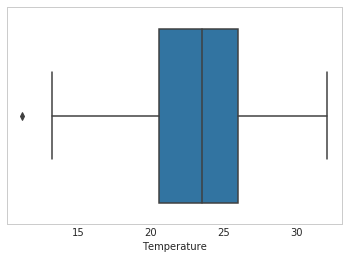

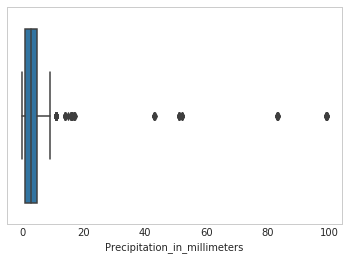

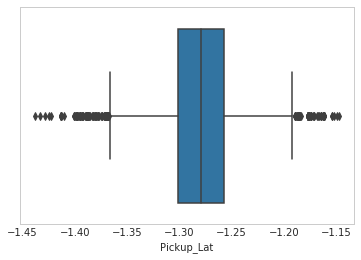

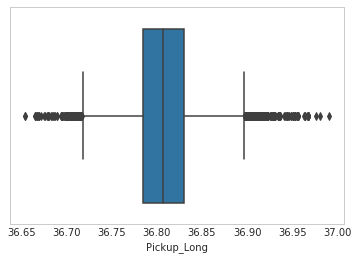

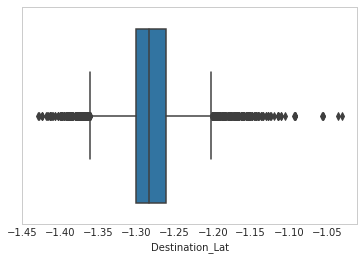

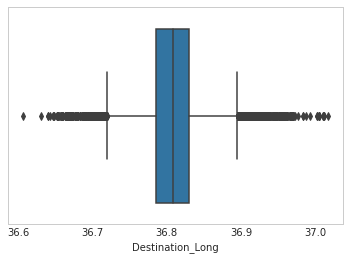

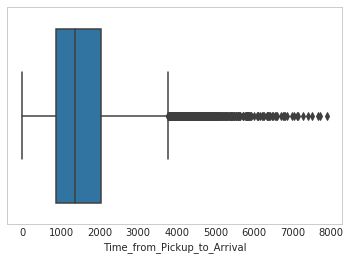

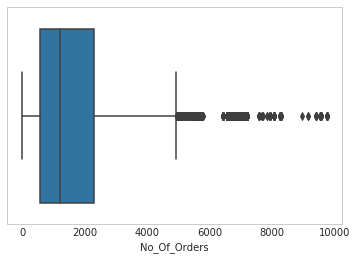

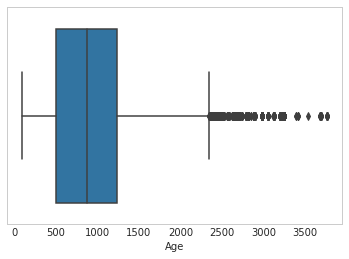

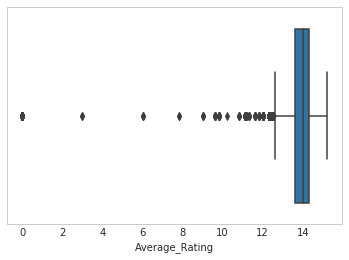

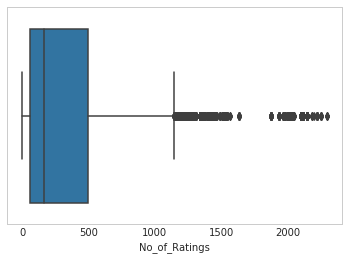

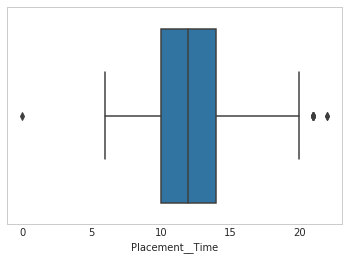

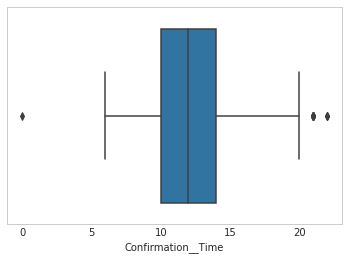

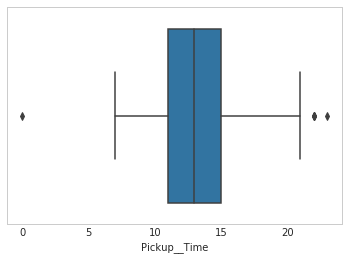

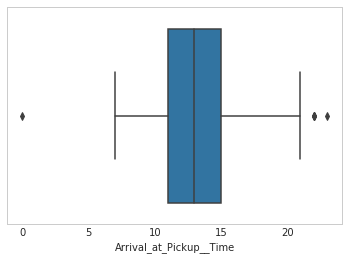

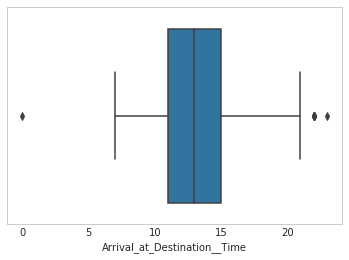

In [34]:
show_outliers.fit_transform(dataset)

#### Process Outliers

In [35]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    def __init__(self,categorical_time_attributes,categorical_attributes,num_attributes):
        self.categorical_time_attributes = categorical_time_attributes
        self.categorical_attributes = categorical_attributes
        self.num_attributes = num_attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        numerical_attributes_comb = self.num_attributes + [i for i in self.categorical_time_attributes if i not in self.categorical_attributes]
        for i in numerical_attributes_comb:
            iqr = X[i].quantile(0.75) - X[i].quantile(0.25)
            high_q = X[X[i]>X[i].quantile(0.75)+iqr*1.5]
            low_q = X[X[i]<X[i].quantile(0.25)-iqr*1.5]
            X = X.drop(high_q.index)
            X = X.drop(low_q.index)
        return X

In [36]:
remove_outliers = RemoveOutliers(categorical_time_attributes,categorical_attributes,numerical_attributes)

In [37]:
dataset = remove_outliers.fit_transform(dataset)

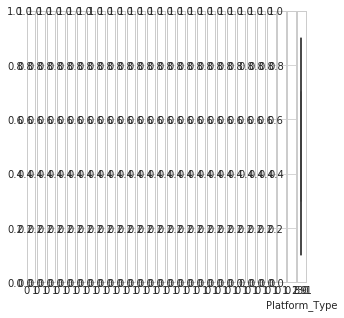

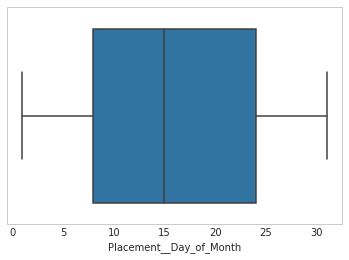

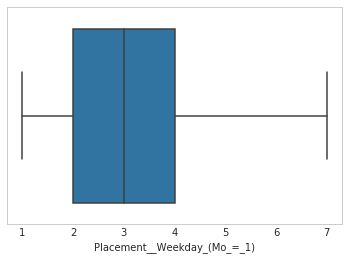

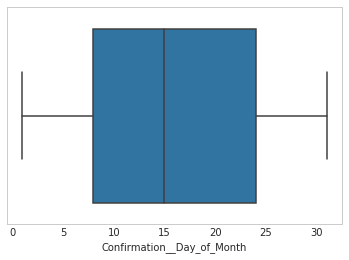

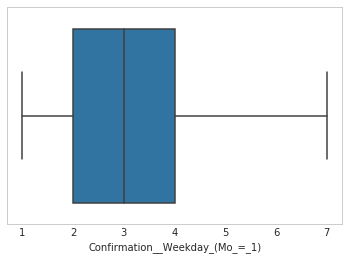

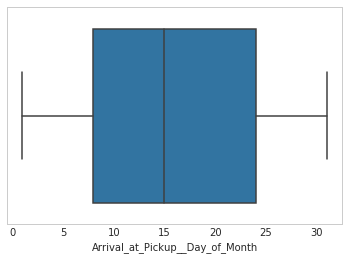

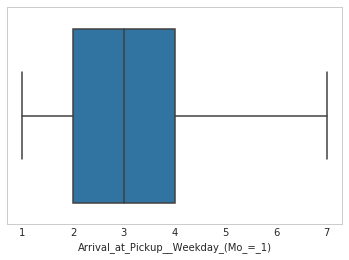

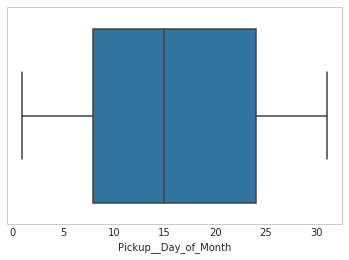

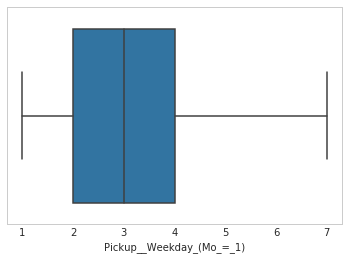

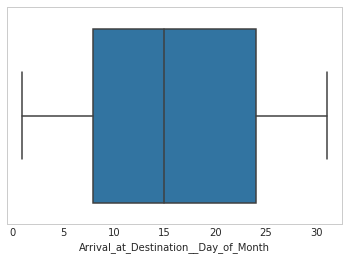

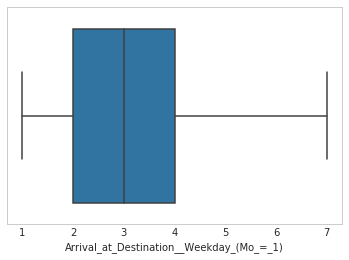

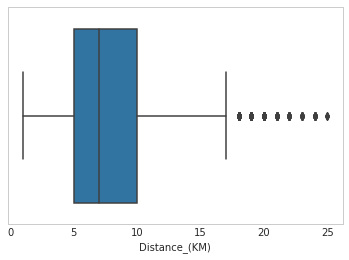

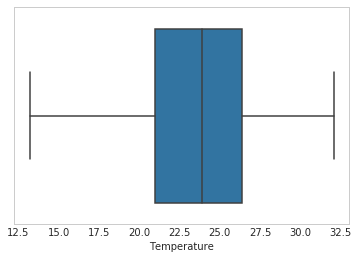

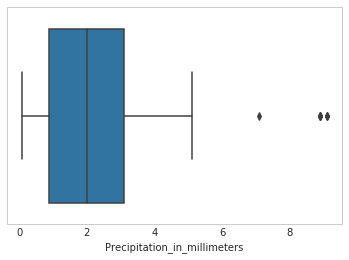

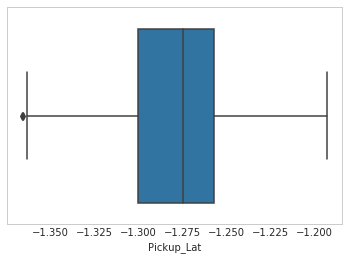

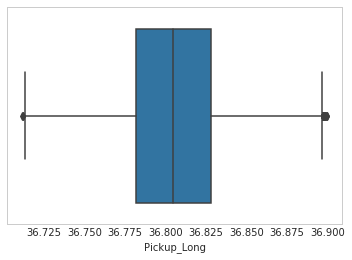

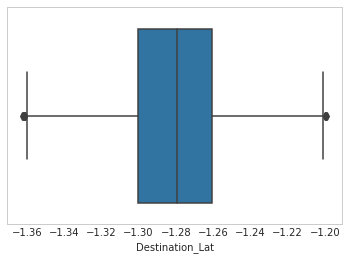

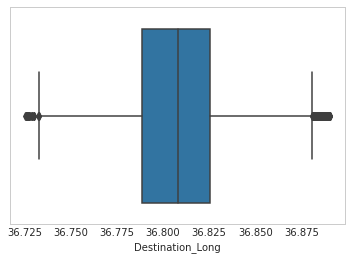

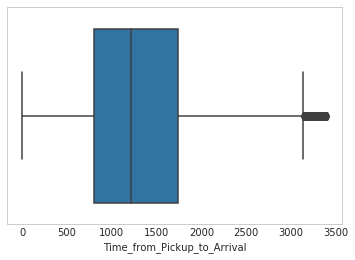

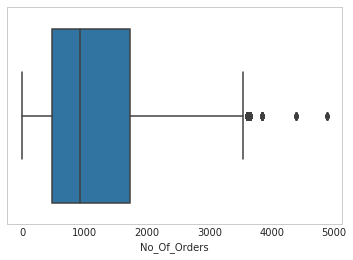

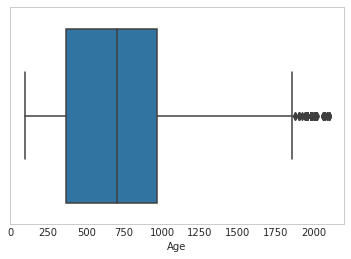

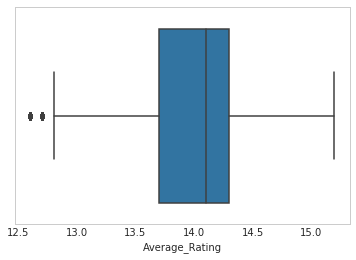

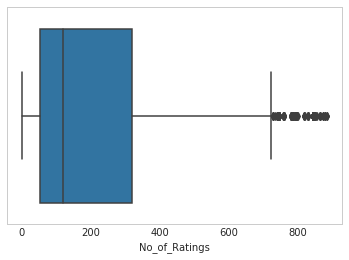

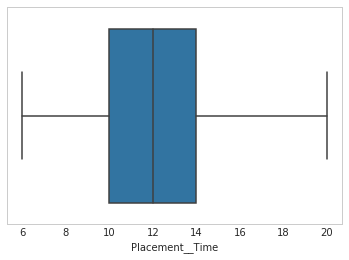

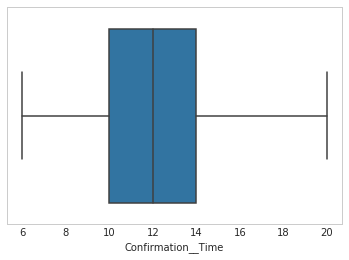

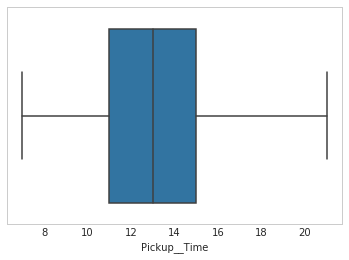

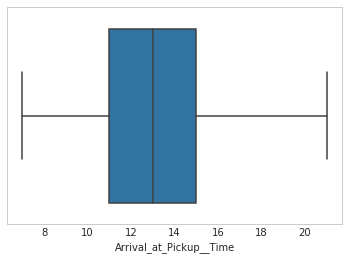

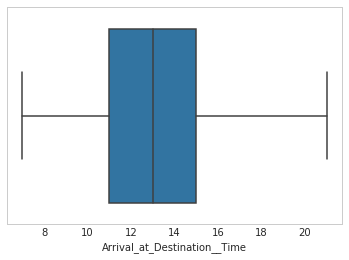

In [38]:
show_outliers.fit_transform(dataset)

#### Process categorical attributes (combining numerical and time seies)

In [39]:
dataset.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,0,3,0,9,5,9,9,5,9,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,0,3,1,12,5,11,12,5,11,12,...,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
3,0,3,0,15,5,9,15,5,9,15,...,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
6,0,3,0,9,5,9,9,5,9,9,...,NaN,-1.279395,36.825364,-1.276574,36.851365,1380,288,556,13.7,27
8,0,3,0,30,2,11,30,2,11,30,...,NaN,-1.255189,36.782203,-1.300255,36.825657,3398,162,237,15.0,14


#### Check correlation

In [40]:
correlation = dataset.corr()

In [41]:
correlation['Time_from_Pickup_to_Arrival'].sort_values(ascending=False)

Time_from_Pickup_to_Arrival                 1.000000
Distance_(KM)                               0.570675
Precipitation_in_millimeters                0.084295
Arrival_at_Destination__Time                0.073775
Pickup_Long                                 0.060443
Personal_or_Business                        0.023558
Destination_Long                            0.016372
Temperature                                 0.010078
Confirmation__Weekday_(Mo_=_1)              0.007628
Arrival_at_Destination__Weekday_(Mo_=_1)    0.007628
Pickup__Weekday_(Mo_=_1)                    0.007628
Arrival_at_Pickup__Weekday_(Mo_=_1)         0.007628
Placement__Weekday_(Mo_=_1)                 0.007442
Arrival_at_Pickup__Time                     0.003734
Confirmation__Time                         -0.006234
Pickup__Time                               -0.007014
Confirmation__Day_of_Month                 -0.011923
Arrival_at_Pickup__Day_of_Month            -0.011923
Arrival_at_Destination__Day_of_Month       -0.

In [42]:
dataset.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,0,3,0,9,5,9,9,5,9,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,0,3,1,12,5,11,12,5,11,12,...,NaN,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
3,0,3,0,15,5,9,15,5,9,15,...,NaN,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
6,0,3,0,9,5,9,9,5,9,9,...,NaN,-1.279395,36.825364,-1.276574,36.851365,1380,288,556,13.7,27
8,0,3,0,30,2,11,30,2,11,30,...,NaN,-1.255189,36.782203,-1.300255,36.825657,3398,162,237,15.0,14


In [43]:
correlation1 = dataset.corr()

In [44]:
correlation1['Time_from_Pickup_to_Arrival'].sort_values(ascending=False)

Time_from_Pickup_to_Arrival                 1.000000
Distance_(KM)                               0.570675
Precipitation_in_millimeters                0.084295
Arrival_at_Destination__Time                0.073775
Pickup_Long                                 0.060443
Personal_or_Business                        0.023558
Destination_Long                            0.016372
Temperature                                 0.010078
Confirmation__Weekday_(Mo_=_1)              0.007628
Arrival_at_Destination__Weekday_(Mo_=_1)    0.007628
Pickup__Weekday_(Mo_=_1)                    0.007628
Arrival_at_Pickup__Weekday_(Mo_=_1)         0.007628
Placement__Weekday_(Mo_=_1)                 0.007442
Arrival_at_Pickup__Time                     0.003734
Confirmation__Time                         -0.006234
Pickup__Time                               -0.007014
Confirmation__Day_of_Month                 -0.011923
Arrival_at_Pickup__Day_of_Month            -0.011923
Arrival_at_Destination__Day_of_Month       -0.

In [45]:
class RemoveUncorrelated(BaseEstimator,TransformerMixin):
    def __init__(self,column_names):
        self.column_names =column_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X = X.drop(self.column_names,axis=1)
        return X

In [46]:
uncorrelated_cols = ['Average_Rating','Confirmation__Time','Destination_Long','Placement__Time','Pickup_Lat','Age','No_of_Ratings','No_Of_Orders','Destination_Lat']

In [47]:
remove_uncorrelated = RemoveUncorrelated(column_names=uncorrelated_cols)
dataset = remove_uncorrelated.fit_transform(dataset)

In [48]:
dataset.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Arrival_at_Pickup__Day_of_Month,Arrival_at_Pickup__Weekday_(Mo_=_1),Arrival_at_Pickup__Time,...,Pickup__Weekday_(Mo_=_1),Pickup__Time,Arrival_at_Destination__Day_of_Month,Arrival_at_Destination__Weekday_(Mo_=_1),Arrival_at_Destination__Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Long,Time_from_Pickup_to_Arrival
0,0,3,0,9,5,9,5,9,5,10,...,5,10,9,5,10,4,20.4,NaN,36.830370,745
1,0,3,1,12,5,12,5,12,5,11,...,5,11,12,5,12,16,26.4,NaN,36.899315,1993
3,0,3,0,15,5,15,5,15,5,9,...,5,9,15,5,10,9,19.2,NaN,36.832396,1341
6,0,3,0,9,5,9,5,9,5,9,...,5,9,9,5,10,5,20.3,NaN,36.825364,1380
8,0,3,0,30,2,30,2,30,2,12,...,2,12,30,2,13,9,NaN,NaN,36.782203,3398


In [49]:
#check correlation again
correlation2 = dataset.corr()

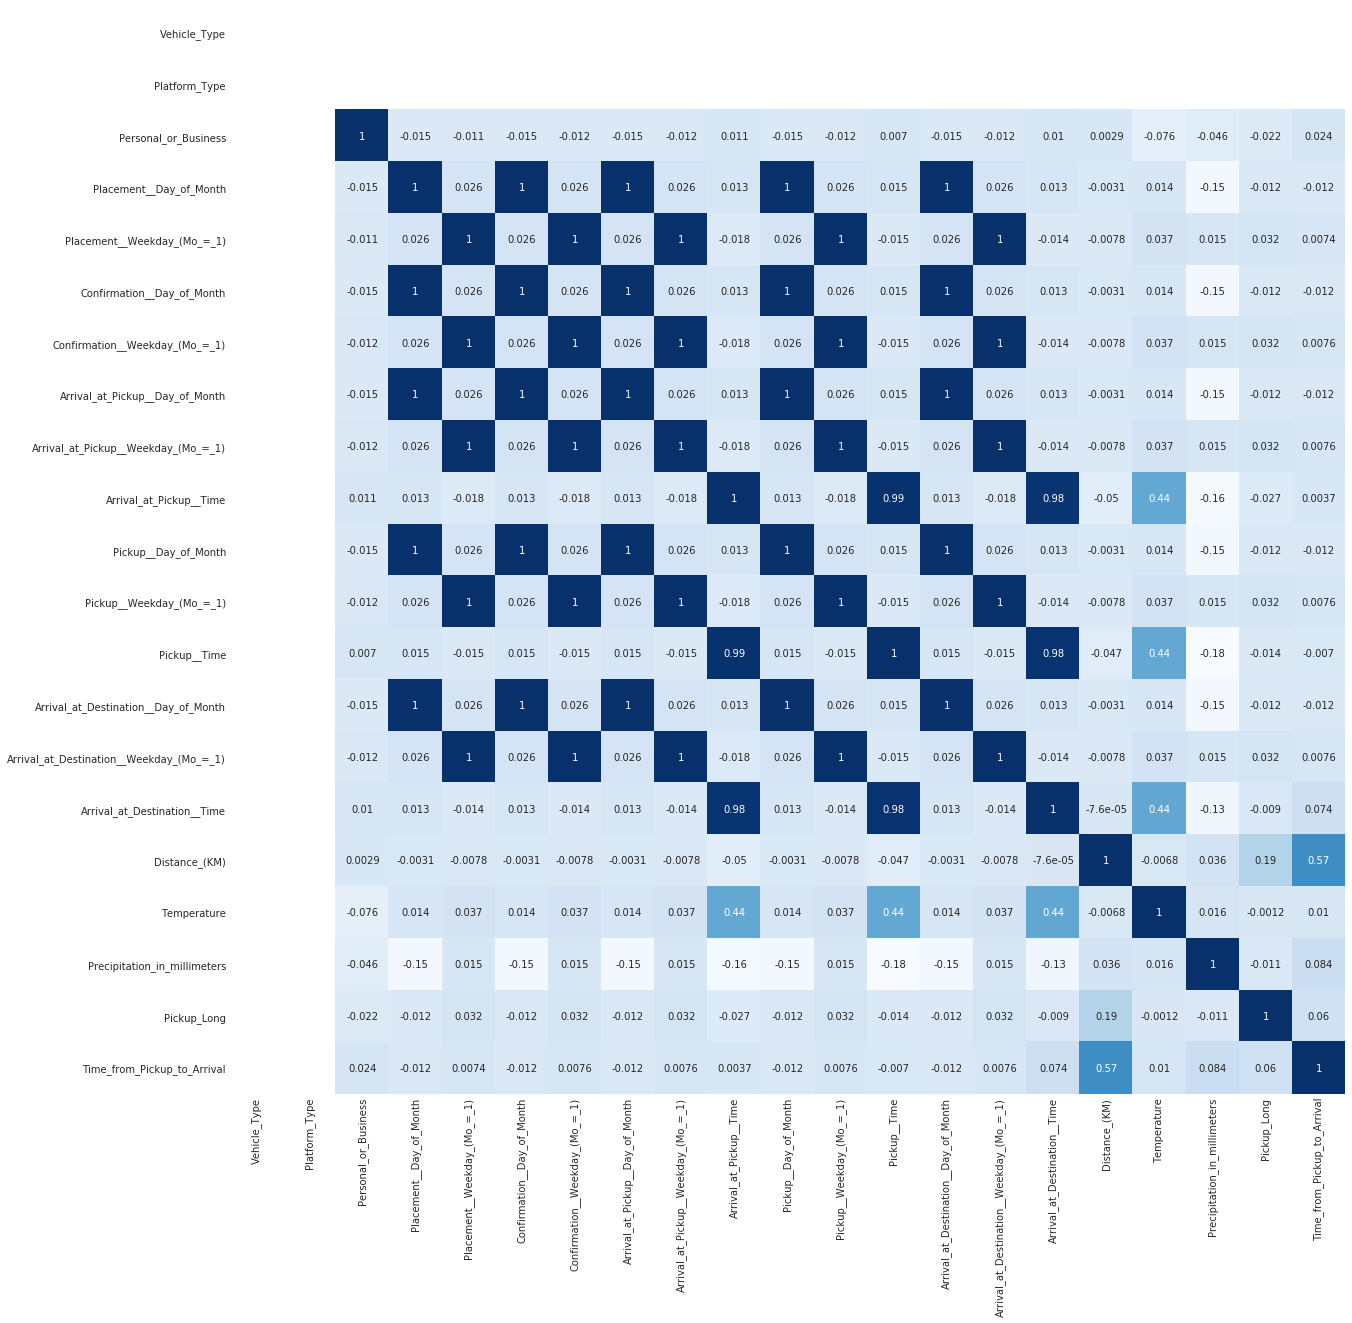

In [50]:
sb.set_style('whitegrid')
plt.figure(figsize=(20,20))
sb.heatmap(correlation2,annot=True,cmap='Blues',cbar=False)

#### split the dataset into train and test 

In [51]:
class Spliter(BaseEstimator,TransformerMixin):
    def __init__(self,test_size,target_column):
        self.test_size = test_size
        self.target_column = target_column
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        np.random.seed(100)
        shuffle_indeces = np.random.permutation(len(X))
        test_ratio = np.int(len(X)*self.test_size)
        train_indeces = shuffle_indeces[test_ratio:]
        test_indeces = shuffle_indeces[:test_ratio]
        train_set = X.iloc[train_indeces]
        test_set = X.iloc[test_indeces]
        train_set_labels = train_set[self.target_column].copy()
        train_set_features = train_set.drop(self.target_column,axis=1)
        test_set_labels = test_set[self.target_column].copy()
        test_set_features = test_set.drop(self.target_column,axis=1)
        return train_set_features,train_set_labels,test_set_features,test_set_labels
        

In [52]:
target_column = ['Time_from_Pickup_to_Arrival']
spliter = Spliter(test_size=0.15,target_column=target_column)
train_set_features,train_set_labels,test_set_features,test_set_labels = spliter.fit_transform(dataset)

In [53]:
train_set_features.shape

(10001, 20)

In [54]:
train_set_labels.head()

,Time_from_Pickup_to_Arrival
10424,1912
12999,1759
4777,857
16879,431
17423,2484


In [55]:
train_set_features.isna().sum()

Vehicle_Type                                   0
Platform_Type                                  0
Personal_or_Business                           0
Placement__Day_of_Month                        0
Placement__Weekday_(Mo_=_1)                    0
Confirmation__Day_of_Month                     0
Confirmation__Weekday_(Mo_=_1)                 0
Arrival_at_Pickup__Day_of_Month                0
Arrival_at_Pickup__Weekday_(Mo_=_1)            0
Arrival_at_Pickup__Time                        0
Pickup__Day_of_Month                           0
Pickup__Weekday_(Mo_=_1)                       0
Pickup__Time                                   0
Arrival_at_Destination__Day_of_Month           0
Arrival_at_Destination__Weekday_(Mo_=_1)       0
Arrival_at_Destination__Time                   0
Distance_(KM)                                  0
Temperature                                 2325
Precipitation_in_millimeters                9789
Pickup_Long                                    0
dtype: int64

In [56]:
test_set_features.shape

(1764, 20)

In [57]:
class ProcessNumerical(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                                 ('scaler',StandardScaler())])
        X = num_pipeline.fit_transform(X)
        return X

In [58]:
num_processor = ProcessNumerical()
train_set_features = num_processor.fit_transform(train_set_features)
test_set_features = num_processor.fit_transform(test_set_features)

#### create models

In [59]:
#selec algorithm to work with and train them to get model
svm = SVR()
mlp = MLPRegressor()
abr = AdaBoostRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor(nthread=-1,objective='reg:squarederror')
models = [svm,mlp,abr,dtr,gbr,xgb]
model_names = ['svm','mlp','abr','dtr','gbr','xgb']

In [60]:
def train(models,model_names):
    rmse = []
    names = []
    for model,model_name in zip(models,model_names):
        model.fit(train_set_features,train_set_labels)  
        m_mse = cross_val_score(model,train_set_features,train_set_labels,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
        predictions = model.predict(test_set_features)
        rmserror = mean_squared_error(predictions,test_set_labels)
        rmse.append(np.sqrt(-m_mse).mean())
        names.append(model_name)
        import joblib
        joblib.dump(model,'./Model/'+model_name+'.pkl')
    return rmse,names

In [61]:
rmse,models_names = train(models=models,model_names=model_names)

In [62]:
#visualizing the results 
#create a pandas dataframe 
result = pd.Series(data=[i for i in rmse],index=model_names)
result_df = pd.DataFrame()
result_df.append(result,ignore_index=True)

,abr,dtr,gbr,mlp,svm,xgb
0,622.422652,829.66437,553.674207,610.980752,682.967379,552.705345


In [63]:
model_gbr = joblib.load('./Model/gbr.pkl')
model_xgb = joblib.load('./Model/xgb.pkl')

In [64]:
predictions_gbr = model_gbr.predict(test_set_features)
predictions_xgb = model_xgb.predict(test_set_features)

In [65]:
rmse_gbr = np.sqrt(mean_squared_error(predictions_gbr,test_set_labels))
rmse_xgb = np.sqrt(mean_squared_error(predictions_xgb,test_set_labels))
xgb_accuracy = model_xgb.score(test_set_features,test_set_labels)
gbr_accuracy = model_gbr.score(test_set_features,test_set_labels)

In [66]:
print("RMSE GBR : ",rmse_gbr,' And Accuracy : ',gbr_accuracy)

RMSE GBR :  545.6863328371851  And Accuracy :  0.42313371491495955


In [67]:
print("RMSE XGB : ",rmse_xgb,' And Accuracy : ',xgb_accuracy)

RMSE XGB :  545.233626476088  And Accuracy :  0.42409046495398534


In [68]:
#load testing data
test_data = pd.read_csv('/home/nsomazr/AISuccess/Challenges/Zindi/SendLogistics/Data/Test.csv')

In [69]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [70]:
column_names = test_data.columns
rename_cols = RenameColumns(column_names=column_names)

In [71]:
test_data = rename_cols.fit_transform(test_data)

In [72]:
predictions_df = test_data['Order_No']

In [73]:
test_data.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),...,Pickup__Weekday_(Mo_=_1),Pickup__Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [74]:
#process categorical 
cat_process = ProcessCategorical(categorical_attributes)

In [75]:
test_data = cat_process.fit_transform(test_data)

In [76]:
test_data.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),...,Pickup__Weekday_(Mo_=_1),Pickup__Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,0,3,0,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,0,3,0,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,0,3,0,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,0,3,0,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,0,3,0,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [77]:
#drop unnecessary cols
unnecess_cols = DropLessImportant(less_important_cols)

In [78]:
test_data = unnecess_cols.fit_transform(test_data)

In [79]:
test_data.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,...,Pickup__Day_of_Month,Pickup__Weekday_(Mo_=_1),Pickup__Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long
0,0,3,0,27,3,4:44:10 PM,27,3,4:44:29 PM,27,...,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390
1,0,3,0,17,5,12:57:35 PM,17,5,12:59:17 PM,17,...,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907
2,0,3,0,27,4,11:08:14 AM,27,4,11:25:05 AM,27,...,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365
3,0,3,0,17,1,1:51:35 PM,17,1,1:53:27 PM,17,...,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658
4,0,3,0,11,2,11:30:28 AM,11,2,11:34:45 AM,11,...,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161


In [80]:
#process time 
time_attributes = ['Placement__Time','Confirmation__Time','Pickup__Time','Arrival_at_Pickup__Time']

In [81]:
test_data[time_attributes] = pd.to_datetime(test_data[time_attributes].stack()).unstack()

In [82]:
def getTime(dataset):
    for i in time_attributes:
        test_data[i] = test_data[i].dt.hour 
    return dataset     

In [83]:
test_data = getTime(test_data)

In [84]:
test_data.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,...,Pickup__Day_of_Month,Pickup__Weekday_(Mo_=_1),Pickup__Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long
0,0,3,0,27,3,16,27,3,16,27,...,27,3,17,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390
1,0,3,0,17,5,12,17,5,12,17,...,17,5,13,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907
2,0,3,0,27,4,11,27,4,11,27,...,27,4,11,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365
3,0,3,0,17,1,13,17,1,13,17,...,17,1,14,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658
4,0,3,0,11,2,11,11,2,11,11,...,11,2,11,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161


In [85]:
test_data = test_data.drop(['Destination_Lat','Pickup_Lat'],axis=1)

In [86]:
test_data.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,Arrival_at_Pickup__Weekday_(Mo_=_1),Arrival_at_Pickup__Time,Pickup__Day_of_Month,Pickup__Weekday_(Mo_=_1),Pickup__Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Long,Destination_Long
0,0,3,0,27,3,16,27,3,16,27,3,16,27,3,17,8,NaN,NaN,36.870815,36.822390
1,0,3,0,17,5,12,17,5,12,17,5,13,17,5,13,5,NaN,NaN,36.794723,36.823907
2,0,3,0,27,4,11,27,4,11,27,4,11,27,4,11,5,22.8,NaN,36.822971,36.851365
3,0,3,0,17,1,13,17,1,13,17,1,14,17,1,14,5,24.5,NaN,36.809646,36.790658
4,0,3,0,11,2,11,11,2,11,11,2,11,11,2,11,6,24.4,NaN,36.814423,36.792161


In [87]:
test_data.columns

Index(['Vehicle_Type', 'Platform_Type', 'Personal_or_Business',
       'Placement__Day_of_Month', 'Placement__Weekday_(Mo_=_1)',
       'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_(Mo_=_1)', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month',
       'Arrival_at_Pickup__Weekday_(Mo_=_1)', 'Arrival_at_Pickup__Time',
       'Pickup__Day_of_Month', 'Pickup__Weekday_(Mo_=_1)', 'Pickup__Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Long', 'Destination_Long'],
      dtype='object')

In [88]:
cat_proc = ProcessCategorical(categorical_attributes=categorical_attributes)

In [89]:
test_data = cat_proc.fit_transform(test_data)

In [90]:
test_data.head()

,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_(Mo_=_1),Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_(Mo_=_1),Confirmation__Time,Arrival_at_Pickup__Day_of_Month,Arrival_at_Pickup__Weekday_(Mo_=_1),Arrival_at_Pickup__Time,Pickup__Day_of_Month,Pickup__Weekday_(Mo_=_1),Pickup__Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Long,Destination_Long
0,0,3,0,27,3,16,27,3,16,27,3,16,27,3,17,8,NaN,NaN,36.870815,36.822390
1,0,3,0,17,5,12,17,5,12,17,5,13,17,5,13,5,NaN,NaN,36.794723,36.823907
2,0,3,0,27,4,11,27,4,11,27,4,11,27,4,11,5,22.8,NaN,36.822971,36.851365
3,0,3,0,17,1,13,17,1,13,17,1,14,17,1,14,5,24.5,NaN,36.809646,36.790658
4,0,3,0,11,2,11,11,2,11,11,2,11,11,2,11,6,24.4,NaN,36.814423,36.792161


In [91]:
test_data_pipeline = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                              ('scaler',StandardScaler())])

In [92]:
test_data_scaled = test_data_pipeline.fit_transform(test_data)

In [93]:
test_data_df = pd.DataFrame(test_data_scaled,columns=test_data.columns)

In [94]:
predictions = model_xgb.predict(test_data_scaled)

In [95]:
predictions_values= pd.DataFrame(data=predictions,columns=['Time from Pickup to Arrival'])

In [96]:
predictions_final = pd.concat([predictions_df,predictions_values],axis=1)

In [97]:
predictions_final.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1134.736938
1,Order_No_12736,1192.318115
2,Order_No_768,899.840698
3,Order_No_15332,1258.341797
4,Order_No_21373,1375.592285


In [98]:
predictions_final = predictions_final.set_index(['Order_No','Time from Pickup to Arrival'])

In [99]:
predictions_final.head()

,
Order_No,Time from Pickup to Arrival
Order_No_19248,1134.736938
Order_No_12736,1192.318115
Order_No_768,899.840698
Order_No_15332,1258.341797
Order_No_21373,1375.592285


In [100]:
predictions = predictions_final.to_csv('./Predictions/predictions.csv')

In [101]:
pr = pd.read_csv('/home/nsomazr/AISuccess/Challenges/Zindi/SendLogistics/Notebooks/Prepredictions = predictions_final.to_csv('./Predictions/predictions.csv')dictions/predictions.csv')